![title](img/cross.png)
[ref](http://playground.tensorflow.org)
[to read](https://theclevermachine.wordpress.com/tag/backpropagation-algorithm/)

# Sigmoid Function

$$
\begin{align}
                    g(x) & = \frac{1}{1+e^{-x}}\\
        \frac{d}{dx}g(x) =\nabla g & = (1-g).g \\
                         & = \frac{e^{x}}{(1 + e^{x})^2}
\end{align}
$$
[ref](http://mathworld.wolfram.com/SigmoidFunction.html)

In [1]:
%matplotlib inline

import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)
from sympy import symbols, exp, diff
from sympy.plotting import plot
x = symbols('x')

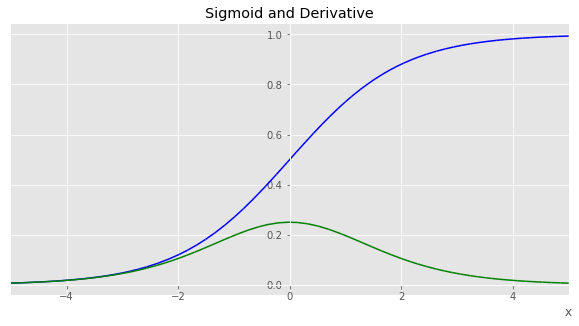

In [2]:
g=1/(1+exp(-x))
dg_x=diff(g) #d/dx g(x)=exp(-x)/(1 + exp(-x))**2
dg_g=(1-g)*g #d/dx g(x)=(1-g)*g
p1 = plot(g, (x, -5, 5), show=False, line_color='b', title="Sigmoid and Derivative",  ylabel="", magin=1)
p2 = plot(dg_x, (x, -5, 5), show=False, line_color='g')
p3 = plot(dg_g, (x, -5, 5), show=False, line_color='r')
p3.style='wireframe'
p1.extend(p2)
#p1.extend(p3)
p1.show()

# Steepest Descent method

$$
\begin{align}
        e &= y-y_p\\
        x_{t+1} &= x_t+ e\nabla y\\
\end{align}
$$
[ref](http://mathworld.wolfram.com/MethodofSteepestDescent.html)

In [3]:
a=np.array([[1,2],
            [2,1]])
b=np.array([[3,4],
            [0,-1]])

print "matrix multiplication\n%s\n"%np.dot(a,b) 
print "element-wise multiplication\n%s\n"%(a*b)

matrix multiplication
[[3 2]
 [6 7]]

element-wise multiplication
[[ 3  8]
 [ 0 -1]]



# Backpropagation

In [4]:
def g(x):    
    return 1/(1+np.exp(-x))

def grad_g(g):
        return (1-g)*g

In [5]:
#input data [Nx3]
X = np.array([[0,0,1],  # [x0, x1, 1]
            [0,1,1],
            [1,0,1],
            [1,1,1]])

#output data [Nx2] hot-one
y = np.array([[0,1],
             [1,0],
             [1,0],
             [0,1]])

# 1 0
# 0 1

In [6]:
np.random.seed(1)
h = 2*np.random.random((3,4)) - 1  # [3x4] (2 inputs + 1 bias) x 4 nodes in the hidden layer
a = 2*np.random.random((4,2)) - 1  # [4x2] (4 nodes x 1 output) - no bias term in this output layer.

In [7]:

for j in xrange(100000):  
    
    # Calculate forward through the network.
    l0 = g(np.dot(X, h))  #[Nx3]x[3x4]
    l1 = g(np.dot(l0, a)) #[Nx4]x[4x2]
    
    # Back propagation of errors using the chain rule. 
    l1_error = y - l1     #[Nx2]
    if(j % 10000) == 0:   # Only print the error every 10000 steps 
        print("Error: " + str(np.mean(np.abs(l1_error))))
        
    l1_delta = l1_error * grad_g(l1)    #[Nx2]
    
    l0_error = l1_delta.dot(a.T)        #[Nx2]x[2x4]
    
    l0_delta = l0_error * grad_g(l0)    #[Nx4]
    
    #update weights (no learning rate term)
    h += X.T.dot(l0_delta)              #[3xN]x[Nx4]
    a += l0.T.dot(l1_delta)             #[4xN]x[Nx2]
    
    
print("Output after training")
print(l1)

Error: 0.499545190569
Error: 0.00962754972601
Error: 0.00658457455354
Error: 0.00529996681447
Error: 0.0045510990524
Error: 0.00404701084759
Error: 0.00367845256659
Error: 0.00339406012759
Error: 0.00316611253212
Error: 0.00297817041718
Output after training
[[ 0.00227758  0.99772324]
 [ 0.99859103  0.00140902]
 [ 0.99630505  0.00369392]
 [ 0.00389898  0.99610174]]


In [8]:
h

array([[-7.55580001,  3.67497393, -5.6629333 , -5.92610851],
       [-6.56725123, -1.9237567 , -4.50363133, -7.68622824],
       [ 2.9412093 ,  2.3152585 ,  1.90243921,  9.81590924]])

In [9]:
a

array([[ -8.72384875,   8.71524583],
       [ -5.90300359,   5.90320522],
       [ -4.99484535,   5.00517944],
       [ 11.92346745, -11.92411275]])